In [210]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

In [213]:
def make_gray(data):
      return data.mean(0, True)

def normalize(data):
      data = 1. - data  # flip colors
      data_max = (data.max() + 1e-8)
      data = data / data_max
      return data


train = datasets.ImageFolder('mila8/',
                       transform=transforms.Compose([
                              transforms.Scale(256),
                              transforms.ToTensor(),
                              transforms.Lambda(make_gray),
                              transforms.Lambda(normalize)
                          ]))
train_loader = DataLoader(train, batch_size=100, shuffle=False)

def plot_tensor(img):
    img = img.numpy()[0]
    plt.imshow(img, cmap='gray')

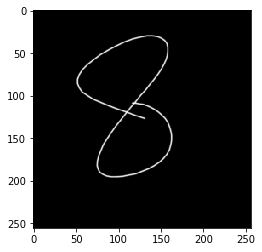

In [215]:
img = train[0][0]
plot_tensor(img)

In [235]:
import numpy
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

def elastic_transform(image, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    if random_state is None:
        random_state = numpy.random.RandomState(None)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = numpy.meshgrid(numpy.arange(shape[0]), numpy.arange(shape[1]))
    indices = numpy.reshape(y+dy, (-1, 1)), numpy.reshape(x+dx, (-1, 1))

    return map_coordinates(image, indices, order=1).reshape(shape)

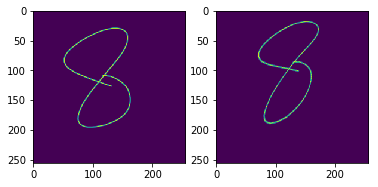

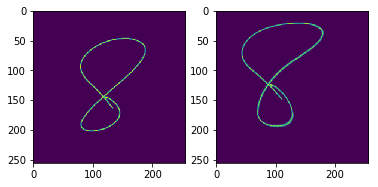

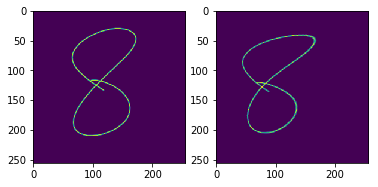

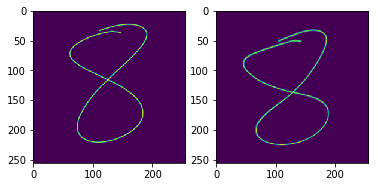

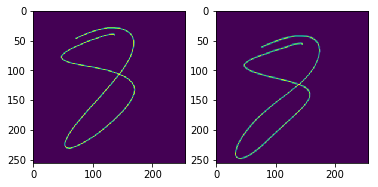

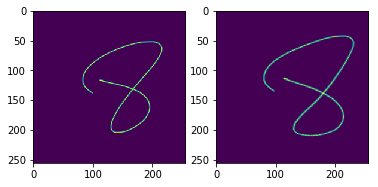

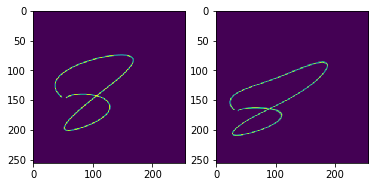

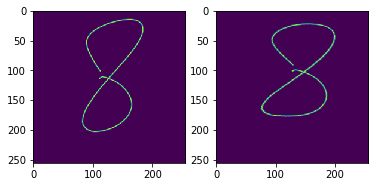

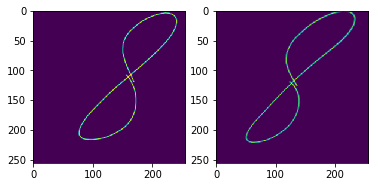

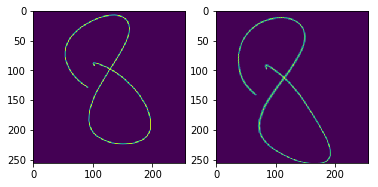

In [254]:
for i in xrange(10):
    plt.figure()
    image = train[i][0].numpy()[0]
    warped = elastic_transform(image, 8000, 70)
    plt.subplot(121)
    plt.imshow(image)
    plt.subplot(122)
    plt.imshow(warped)

In [239]:
import cProfile

cProfile.run('elastic_transform(image, 8000, 170)')

         2909 function calls in 0.232 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.007    0.007    0.232    0.232 <ipython-input-235-ed86d7d6b5c2>:5(elastic_transform)
        1    0.000    0.000    0.232    0.232 <string>:1(<module>)
        5    0.000    0.000    0.000    0.000 _ni_support.py:38(_extend_mode_to_code)
        6    0.000    0.000    0.000    0.000 _ni_support.py:55(_normalize_sequence)
        7    0.000    0.000    0.001    0.000 _ni_support.py:71(_get_output)
        4    0.000    0.000    0.000    0.000 _ni_support.py:91(_check_axis)
        4    0.001    0.000    0.209    0.052 filters.py:120(correlate1d)
        4    0.005    0.001    0.215    0.054 filters.py:190(gaussian_filter1d)
        2    0.000    0.000    0.217    0.108 filters.py:261(gaussian_filter)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:138(reshape)
        2    0.000    0.000    0.000    0.000 fromnum

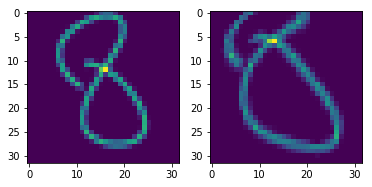

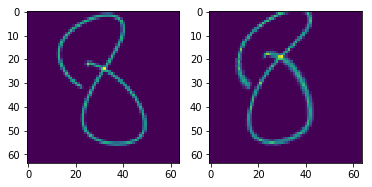

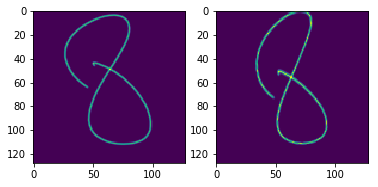

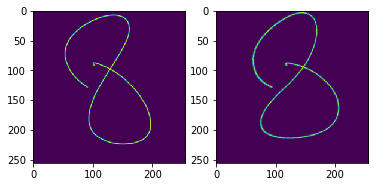

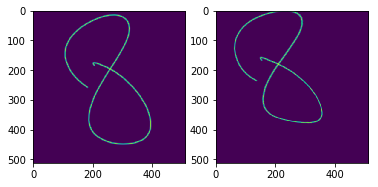

In [255]:
import scipy.misc

for size in (32, 64, 128, 256, 512):
    plt.figure()
    image = train[i][0].numpy()[0]
    resized = scipy.misc.imresize(image, (size, size))
    k = size / 256.
    warped = elastic_transform(resized, 8000 * k**2, int(70 * k))
    plt.title('size {}'.format(size))
    plt.subplot(121)
    plt.imshow(resized)
    plt.subplot(122)
    plt.imshow(warped)

In [246]:
resized.shape


(1310, 1310)